In [1]:
#This part  is for showing the prediction of a single class
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import load_model
from preprocess import *


Taking in Input: 100%|██████████| 9/9 [00:03<00:00,  2.55data_sets/s]


Taking in data from left sensors:completed
 


Taking in Input: 100%|██████████| 9/9 [00:03<00:00,  2.55data_sets/s]


Taking in data from right sensors:completed



Taking in Input: 100%|██████████| 9/9 [00:00<00:00, 26.66data_sets/s]


Taking in data labels:completed
Training data is processeed 

(2097, 16, 1)
(2097, 3)
(525, 16, 1)
(525, 3)


In [2]:
import pandas as pd
# Load the best model saved during training
best_model = load_model('best_model.h5')

prediction = best_model.predict(test_data[10:11,:,:])
reshaped_data = test_data[10:11, :, :].reshape(-1, test_data.shape[-1])

# Define column names
columns = ["acc_x_below_suspension", "acc_y_below_suspension", "acc_z_below_suspension",
           "gyro_x_below_suspension", "gyro_y_below_suspension", "gyro_z_below_suspension", "speed"]

# Create a DataFrame
data = pd.DataFrame(reshaped_data, columns=columns)
print(f"For the sample \n")
print(data)
print("The class wise predicted possibilites is")
print(prediction)

predicted_class = np.argmax(prediction, axis=1) # We take the class with highest probabilty of occuring from all the possibilites
print(f"The predicted class by is (from highest probabilty) {predicted_class} and the actual class is { np.argmax(n_labels_test[10], axis=0)}")


1/1 [==============================] - 1s 711ms/step


ValueError: Shape of passed values is (16, 1), indices imply (16, 7)

In [3]:


predictions = best_model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(n_labels_test, axis=1)
confusion_mat = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(confusion_mat)

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

def performance_matrix(true, pred):
    precision = metrics.precision_score(true,pred,average='weighted')
    recall = metrics.recall_score(true,pred,average='weighted') # average='weighted'
    accuracy = metrics.accuracy_score(true,pred)
    f1_score = metrics.f1_score(true,pred,average='weighted')
    print('Mean \n  precision: {} \n  recall: {}, \n  accuracy: {}, \n  f1_score: {}'.format(precision*100,recall*100,accuracy*100,f1_score*100))

performance_matrix(true_classes, predicted_classes)

# 
from tabulate import tabulate
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(true_classes, predicted_classes)

print('\n')
print('rows is precision, recall, fscore and support:')
print(tabulate([precision, recall, fscore, support], headers=['0' , '1' , '2' , '3', '4'], tablefmt='orgtbl'))

print('\n')
print('per-class accuracy:')
cm = confusion_matrix(true_classes, predicted_classes)
cm = cm.astype('float')*100 / cm.sum(axis=1)[:, np.newaxis]
print(tabulate([cm.diagonal()], headers=['0' , '1' , '2' , '3', '4'], tablefmt='orgtbl'))

31/31 [==============================] - 0s 1ms/step
Confusion Matrix:
[[196  55   1]
 [ 82 193   2]
 [  2  11 435]]
Mean 
  precision: 84.72309460209236 
  recall: 84.33981576253838, 
  accuracy: 84.33981576253838, 
  f1_score: 84.44987311731558


rows is precision, recall, fscore and support:
|          0 |          1 |          2 |
|------------+------------+------------|
|   0.7      |   0.745174 |   0.993151 |
|   0.777778 |   0.696751 |   0.970982 |
|   0.736842 |   0.720149 |   0.981941 |
| 252        | 277        | 448        |


per-class accuracy:
|       0 |       1 |       2 |
|---------+---------+---------|
| 77.7778 | 69.6751 | 97.0982 |


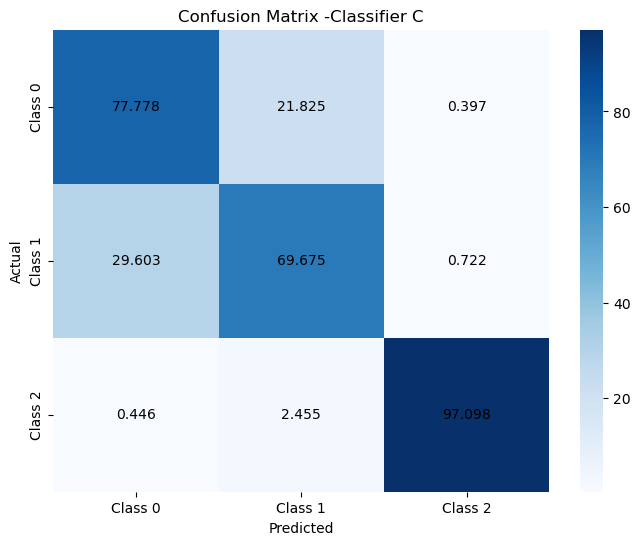

In [4]:
# Plot the confusion matrix with sample counts
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])

# Annotate the heatmap with sample counts
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j + 0.5, i + 0.5, str(np.round(cm[i, j],3)), ha='center', va='center', color='black', fontsize=10)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix -Classifier C')
plt.savefig("Confusion Matrix_Classifier C.png")
plt.show()
